<a href="https://colab.research.google.com/github/syedshubha/QNET25_Shubha/blob/main/DenseError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet qiskit
%pip install --quiet qiskit-aer
%pip install --quiet pylatexenc
%pip install --quiet qutip

In [2]:
# Install the base latex packages
!sudo apt-get update > /dev/null
!sudo apt-get install --quiet texlive-latex-base > /dev/null

# Create symbolic link
!sudo ln -s /usr/bin/pdftex /usr/bin/pdflatex

# Check pdflatex version
!pdflatex --version

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
E: dpkg was interrupted, you must manually run 'sudo dpkg --configure -a' to correct the problem. 
ln: failed to create symbolic link '/usr/bin/pdflatex': File exists
pdfTeX 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian)
kpathsea version 6.3.4/dev
Copyright 2021 Han The Thanh (pdfTeX) et al.
There is NO warranty.  Redistribution of this software is
covered by the terms of both the pdfTeX copyright and
the Lesser GNU General Public License.
For more information about these matters, see the file
named COPYING and the pdfTeX source.
Primary author of pdfTeX: Han The Thanh (pdfTeX) et al.
Compiled with libpng 1.6.37; using libpng 1.6.37
Compiled with zlib 1.2.11; using zlib 1.2.11
Compiled with xpdf version 4.03


In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Gate, Parameter

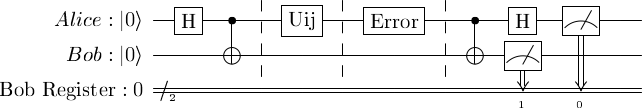

In [4]:
alice = QuantumRegister(1, name='Alice')
bob = QuantumRegister(1, name='Bob')
cr = ClassicalRegister(2, name= "Bob Register")
circuit = QuantumCircuit(alice, bob, cr)

# Create a custom gate
error = Gate(name='Error', num_qubits=1, params=[])
encode = Gate(name='Uij', num_qubits=1, params=[])

circuit.h(0)
circuit.cx(0, 1)

circuit.barrier()

circuit.append(encode,[0])
circuit.barrier()



circuit.append(error, [0])

circuit.barrier()

# Decode the message (Step 3)
circuit.cx(0,1)  # Apply CNOT gate
circuit.h(0)  # Apply Hadamard gate

# Measure the qubits
circuit.measure([0, 1],[0,1])

circuit.draw(output="latex", initial_state=True)

In [5]:
latex_source = circuit.draw(output="latex_source", initial_state=True)
print(latex_source)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{Alice} : \ket{{0}} } & \lstick{{Alice} : \ket{{0}} } & \gate{\mathrm{H}} & \ctrl{1} \barrier[0em]{1} & \qw & \gate{\mathrm{Uij}} \barrier[0em]{1} & \qw & \gate{\mathrm{Error}} \barrier[0em]{1} & \qw & \ctrl{1} & \gate{\mathrm{H}} & \meter & \qw & \qw\\
	 	\nghost{{Bob} : \ket{{0}} } & \lstick{{Bob} : \ket{{0}} } & \qw & \targ & \qw & \qw & \qw & \qw & \qw & \targ & \meter & \qw & \qw & \qw\\
	 	\nghost{\mathrm{{Bob\;Register} : 0 }} & \lstick{\mathrm{{Bob\;Register} : 0 }} & \lstick{/_{_{2}}} \cw & \cw & \cw & \cw & \cw & \cw & \cw & \cw & \dstick{_{_{\hspace{0.0em}1}}} \cw \ar @{<=} [-1,0] & \dstick{_{_{\hspace{0.0em}0}}} \cw \ar @{<=} [-2,0] & \cw & \cw\\
\\ }}
\end{document}


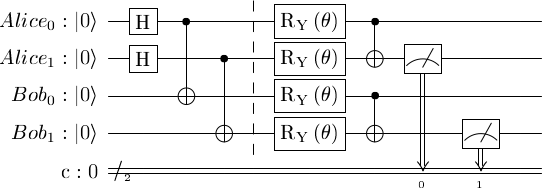

In [8]:
from numpy import pi
theta = Parameter('θ')

def dejmps_purification(theta):
    Alice = QuantumRegister(2, 'Alice')
    Bob = QuantumRegister(2, 'Bob')

    cr = ClassicalRegister(2, 'c')

    qc = QuantumCircuit(Alice, Bob, cr)

    qc.h(Alice[0])
    qc.cx(Alice[0], Bob[0])

    qc.h(Alice[1])
    qc.cx(Alice[1], Bob[1])

    qc.barrier()


    qc.ry(theta, Alice[0])
    qc.ry(theta, Bob[0])
    qc.ry(theta, Alice[1])
    qc.ry(theta, Bob[1])

    qc.cx(Alice[0], Alice[1])
    qc.cx(Bob[0], Bob[1])

    qc.measure(Alice[1], cr[0])
    qc.measure(Bob[1], cr[1])

    return qc



qc = dejmps_purification(theta)
qc.draw(output="latex", initial_state=True)

In [9]:
latex_source = qc.draw(output="latex_source", initial_state=True)
print(latex_source)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{Alice}_{0} : \ket{{0}} } & \lstick{{Alice}_{0} : \ket{{0}} } & \gate{\mathrm{H}} & \ctrl{2} & \qw \barrier[0em]{3} & \qw & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}})} & \ctrl{1} & \qw & \qw & \qw & \qw\\
	 	\nghost{{Alice}_{1} : \ket{{0}} } & \lstick{{Alice}_{1} : \ket{{0}} } & \gate{\mathrm{H}} & \qw & \ctrl{2} & \qw & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}})} & \targ & \meter & \qw & \qw & \qw\\
	 	\nghost{{Bob}_{0} : \ket{{0}} } & \lstick{{Bob}_{0} : \ket{{0}} } & \qw & \targ & \qw & \qw & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}})} & \ctrl{1} & \qw & \qw & \qw & \qw\\
	 	\nghost{{Bob}_{1} : \ket{{0}} } & \lstick{{Bob}_{1} : \ket{{0}} } & \qw & \qw & \targ & \qw & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}})} & \targ & \qw & \meter & \qw & \qw\\
	 	\nghost{\mathrm{{c}

In [10]:
from qutip import *

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.linalg import logm, sqrtm
import warnings

In [11]:
zero = basis(2, 0)
one = basis(2, 1)

bell_state = (tensor(zero, zero) + tensor(one, one)).unit()
I = qeye(2)
rho = ket2dm(bell_state)  # Convert to density matrix

In [12]:
def von_neumann_entropy(rho):
    eigenvalues = rho.eigenenergies()
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    eigenvalues = eigenvalues[eigenvalues > 0]  # Ignore zero eigenvalues
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    return -np.sum(eigenvalues * np.log2(eigenvalues))

In [13]:
# Quantum Mutual Information
def quantum_mutual_information(rho):
    rho_A = rho.ptrace(0)  # Partial trace over B
    rho_B = rho.ptrace(1)  # Partial trace over A
    return von_neumann_entropy(rho_A) + von_neumann_entropy(rho_B) - von_neumann_entropy(rho)

# Classical Mutual Information
def classical_mutual_information(rho):
    rho_A = rho.ptrace(0)  # Partial trace over B
    rho_B = rho.ptrace(1)  # Partial trace over A
    def classical_corr(theta_phi):
        cond_entropy_B = 0
        theta, phi = theta_phi
        # Define measurement operator directly in QuTiP
        proj_0 = Qobj([[np.cos(theta / 2) ** 2, np.cos(theta / 2) * np.sin(theta / 2) * np.exp(-1j * phi)],
                       [np.cos(theta / 2) * np.sin(theta / 2) * np.exp(1j * phi), np.sin(theta / 2)**2]])
        proj_1 = Qobj([[np.sin(theta / 2) ** 2, -np.cos(theta / 2) * np.sin(theta / 2) * np.exp(-1j * phi)],
                       [-np.cos(theta / 2) * np.sin(theta / 2) * np.exp(1j * phi), np.cos(theta / 2)**2]])

        # Extend projectors to two-qubit space
        proj_0 = tensor(proj_0, qeye(2))
        proj_1 = tensor(proj_1, qeye(2))

        for proj in [proj_0, proj_1]:
            p_k = (proj * rho * proj.dag()).tr()
            if p_k > 1e-10:
                rho_post = (proj * rho * proj.dag()) / p_k
                rho_B_k = rho_post.ptrace(1)  # Partial trace over first qubit
                cond_entropy_B += p_k * von_neumann_entropy(rho_B_k)

        return -(von_neumann_entropy(rho_A) - cond_entropy_B)  # Negative for minimization
    result = minimize(classical_corr, [0, 0], bounds=[(0, np.pi), (0, 2 * np.pi)], method='Nelder-Mead')
    return -result.fun
# Quantum Discord
def quantum_discord(rho):
    return quantum_mutual_information(rho) - classical_mutual_information(rho)

In [14]:
# Concurrence for two-qubit state
def concurrence(rho):
    Y = Qobj([[0, -1j], [1j, 0]])  # Pauli Y
    R = rho * tensor(Y, Y) * rho.conj() * tensor(Y, Y)
    eigenvalues = np.sqrt(np.real(np.sort(R.eigenenergies())[::-1]))
    return max(0, eigenvalues[0] - sum(eigenvalues[1:]))

# Entanglement of Formation
def entanglement_of_formation(rho):
    C = concurrence(rho)
    if C == 0:
        return 0
    h = lambda x: -x * np.log2(x) - (1 - x) * np.log2(1 - x) if x > 0 else 0
    return h((1 + np.sqrt(1 - C**2)) / 2)

In [15]:
# Channel
def evolve(rho,lst):
  DM = 0*rho
  for T in lst:
    DM = T*rho*T.dag() + DM
  return DM

In [16]:
def noise_channel(rho, p, q):
    I = qeye(2)
    # Amplitude damping operators
    E0_amp = Qobj([[1, 0], [0, np.sqrt(1 - p)]])
    E1_amp = Qobj([[0, np.sqrt(p)], [0, 0]])
    # Phase damping operators
    E0_phase = Qobj([[np.sqrt(q), 0], [0, 0]])
    E1_phase = Qobj([[0, 0], [0, np.sqrt(q)]])
    E2_phase = Qobj([[np.sqrt(1-q), 0], [0, np.sqrt(1-q)]])

    # Apply amplitude damping on the first qubit
    K0_amp = tensor(E0_amp,I)
    K1_amp = tensor(E1_amp,I)

    # Apply phase damping on the first qubit
    K0_phase = tensor(I,E0_phase)
    K1_phase = tensor(I,E1_phase)
    K2_phase = tensor(I,E2_phase)


    #Extending for two qubit systems
    AD = [K0_amp, K1_amp]
    PD = [K0_phase, K1_phase, K2_phase]

    # Evolve the channel
    rho_after_amp = evolve(rho, AD)
    rho_final1 = evolve(rho_after_amp, PD)

    rho_after_phase = evolve(rho, PD)
    rho_final2= evolve(rho_after_phase, AD)

    rho_final = (rho_final1 + rho_final2)/2
    return rho_final

In [17]:
p = np.linspace(0.01, 1, 100)
q = np.linspace(0.1, 1, 10)
rho = ket2dm(bell_state)

discord_list = [[] for i in range(len(q))]
eof_list = [[] for i in range(len(q))]
fid_list = [[] for i in range(len(q))]

for i in range(len(q)):
  for j in range(len(p)):
    rho_final = noise_channel(rho, p[j], q[i])
    discord = quantum_discord(rho_final)
    eof = entanglement_of_formation(rho_final)
    fid = metrics.fidelity(rho, rho_final)
    fid_list[i].append(fid**2)
    discord_list[i].append(discord)
    eof_list[i].append(eof)
colors = plt.cm.tab20(np.linspace(0, 1, 10))

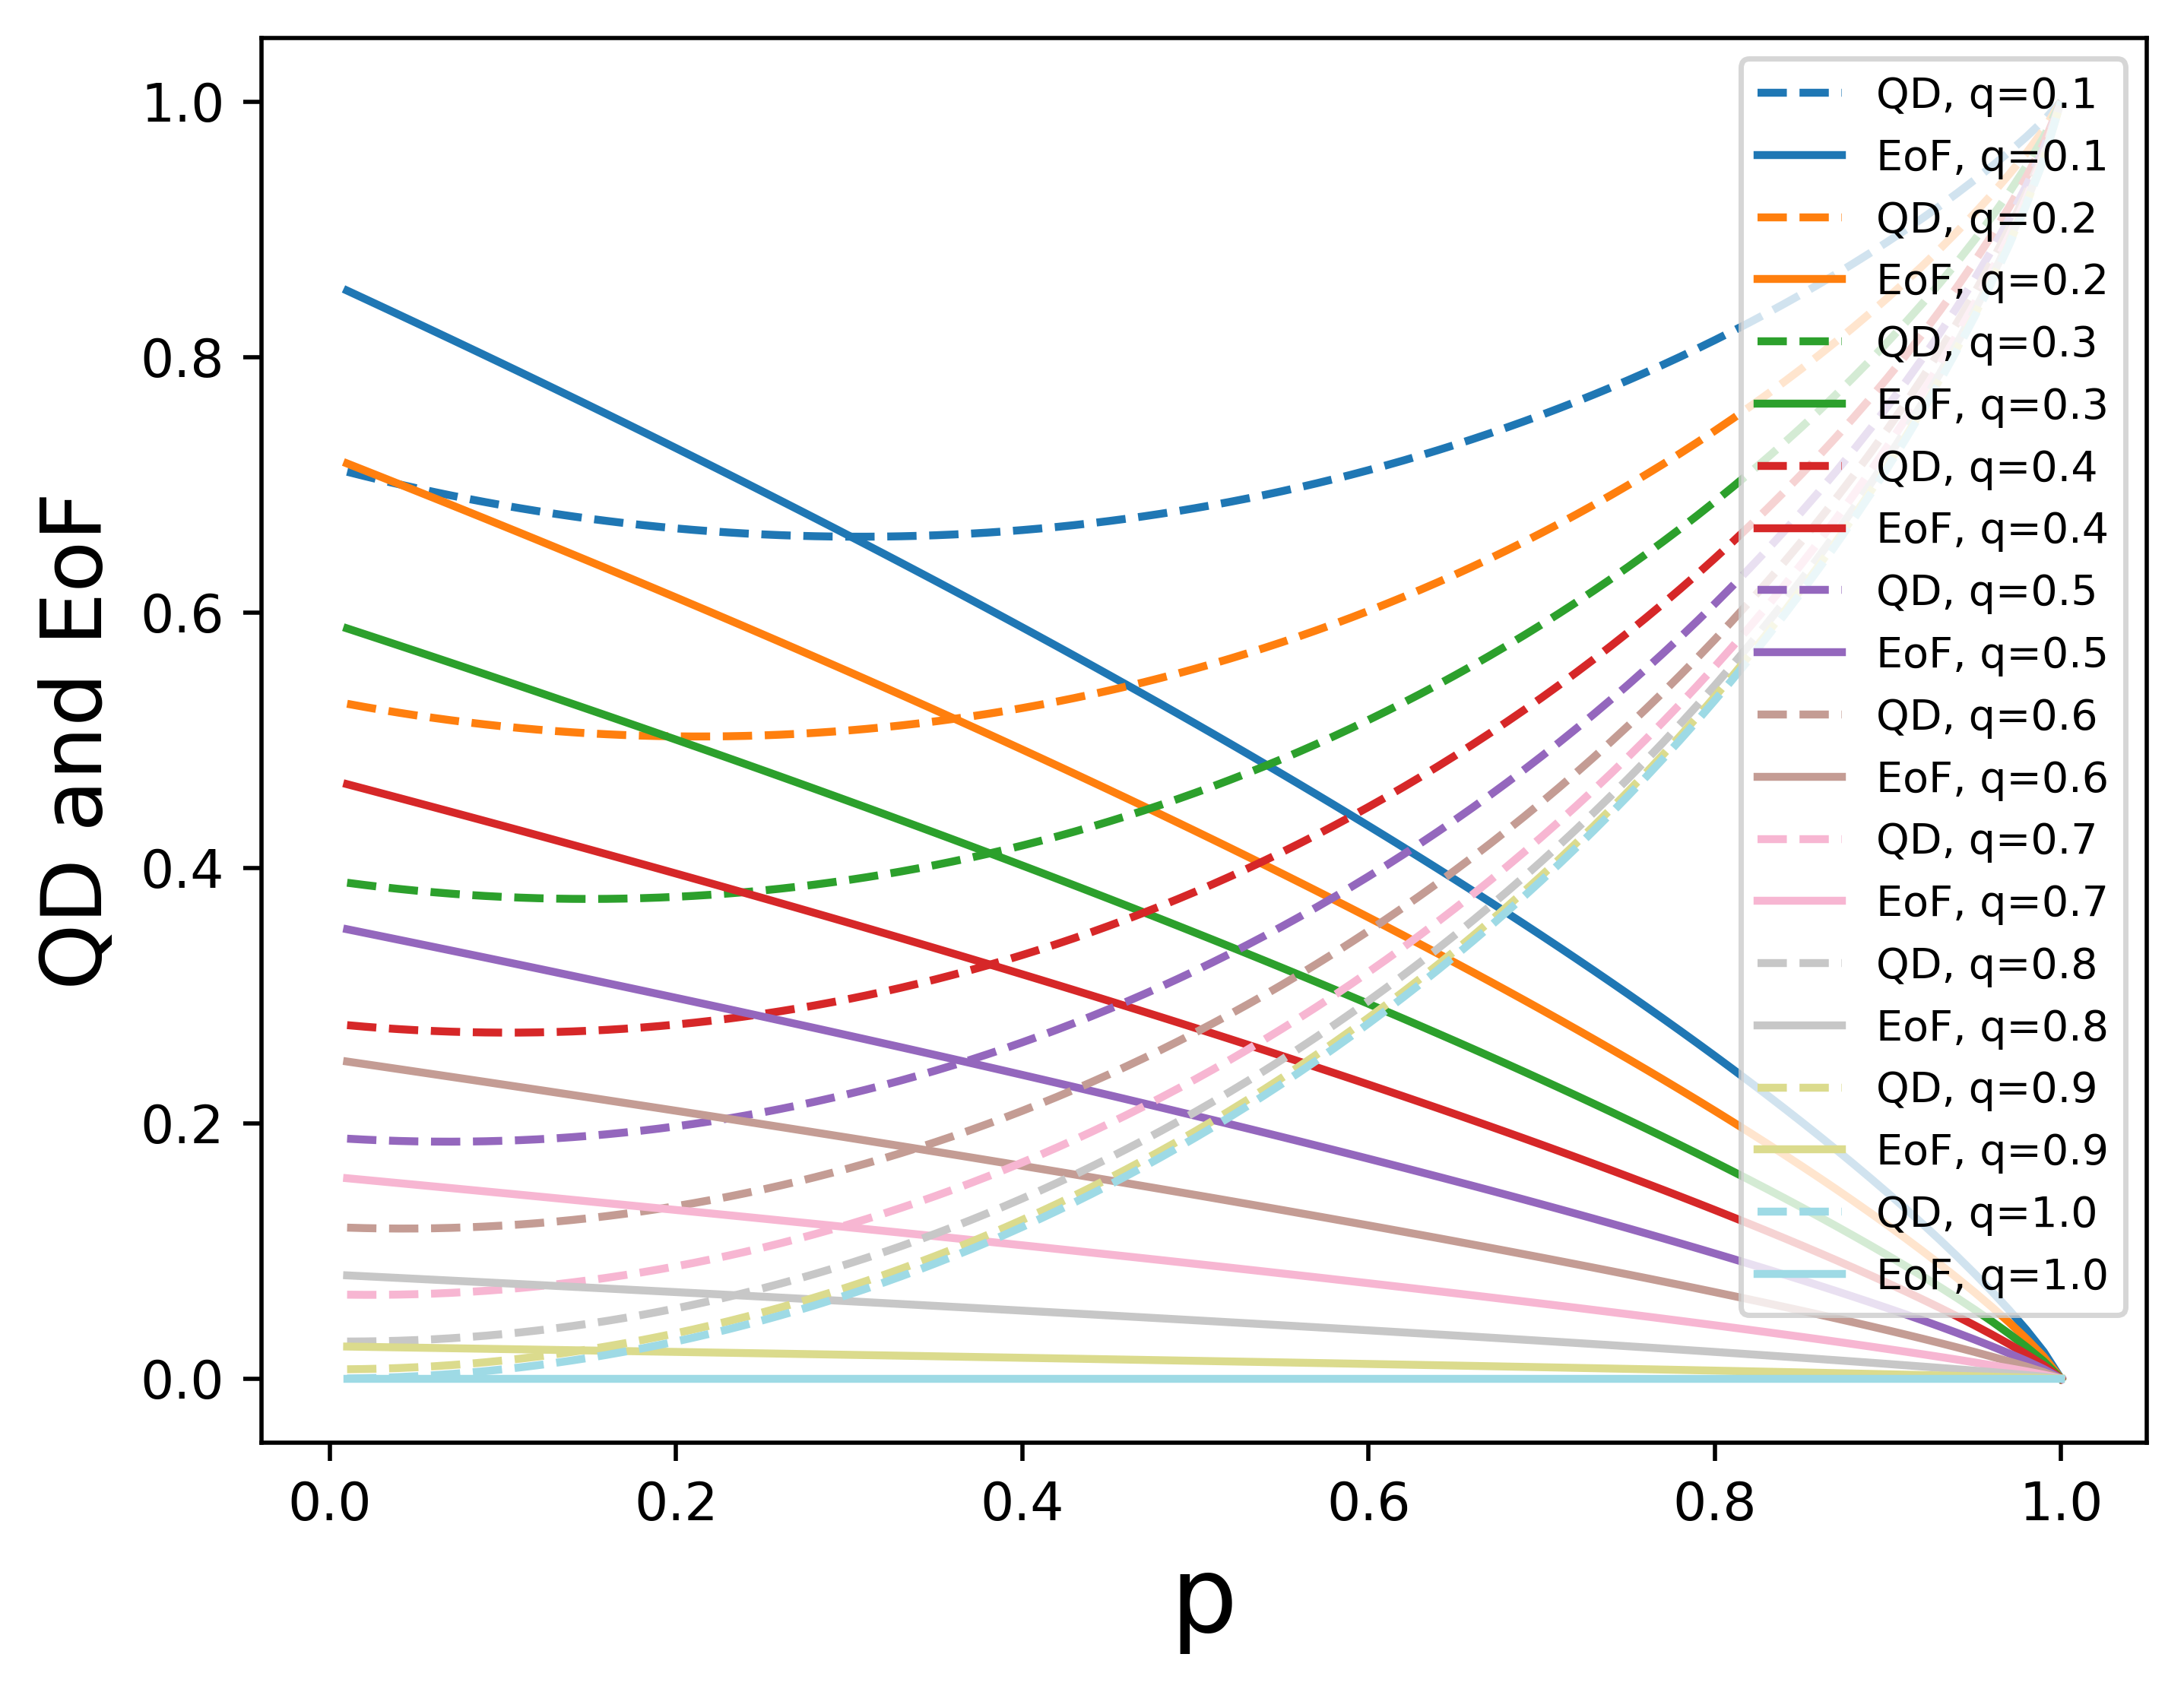

In [18]:
plt.figure(dpi=500)
for i in range(10):
  plt.plot(p, discord_list[i], label=f"QD, q={round(q[i],2)}", linestyle='--', color=colors[i])
  plt.plot(p, eof_list[i], label=f"EoF, q={round(q[i],2)}", color=colors[i])
plt.xlabel('p',fontsize=20)
plt.ylabel('QD and EoF',fontsize=16)
plt.legend(loc='upper right', fontsize=8)
plt.savefig('QDEoF.png', bbox_inches='tight')
plt.show()

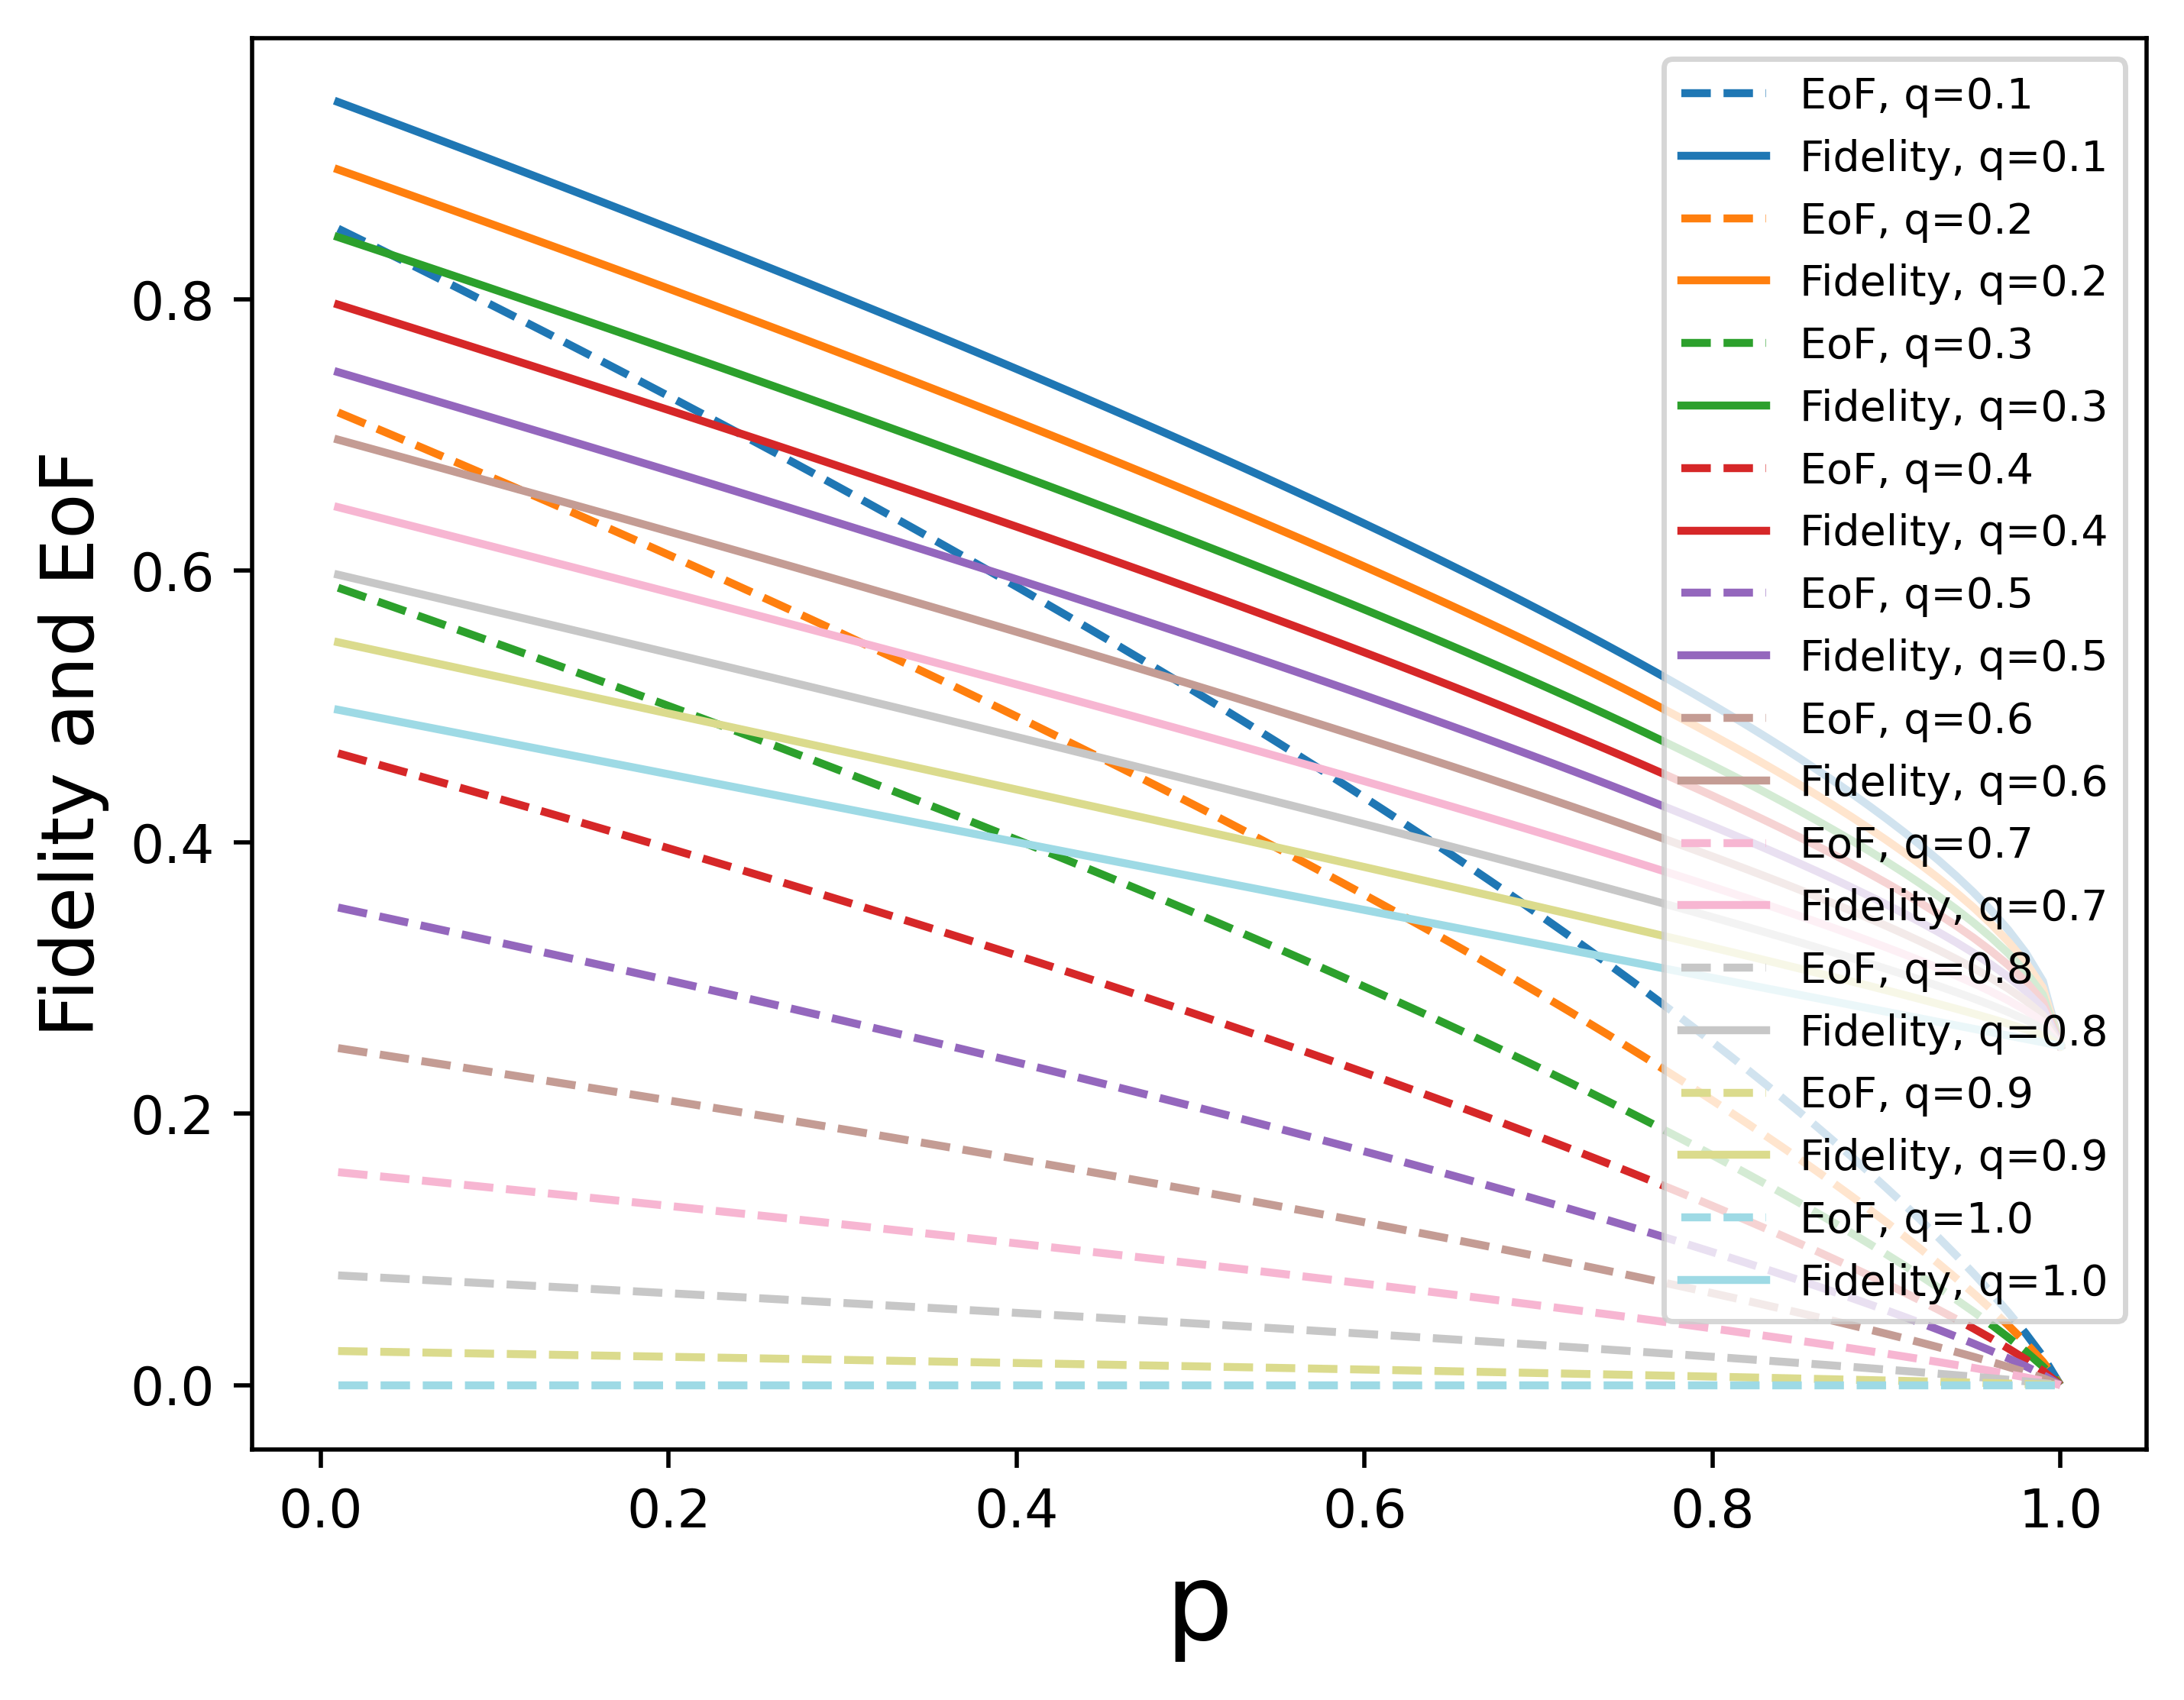

In [19]:
plt.figure(dpi=500)
for i in range(10):
  plt.plot(p, eof_list[i], label=f"EoF, q={round(q[i],2)}", linestyle='--', color=colors[i])
  plt.plot(p, fid_list[i], label=f"Fidelity, q={round(q[i],2)}", color=colors[i])
plt.xlabel('p',fontsize=20)
plt.ylabel('Fidelity and EoF',fontsize=14)
plt.legend(loc='upper right', fontsize=8)
plt.savefig('FidEoF.png', bbox_inches='tight')
plt.show()

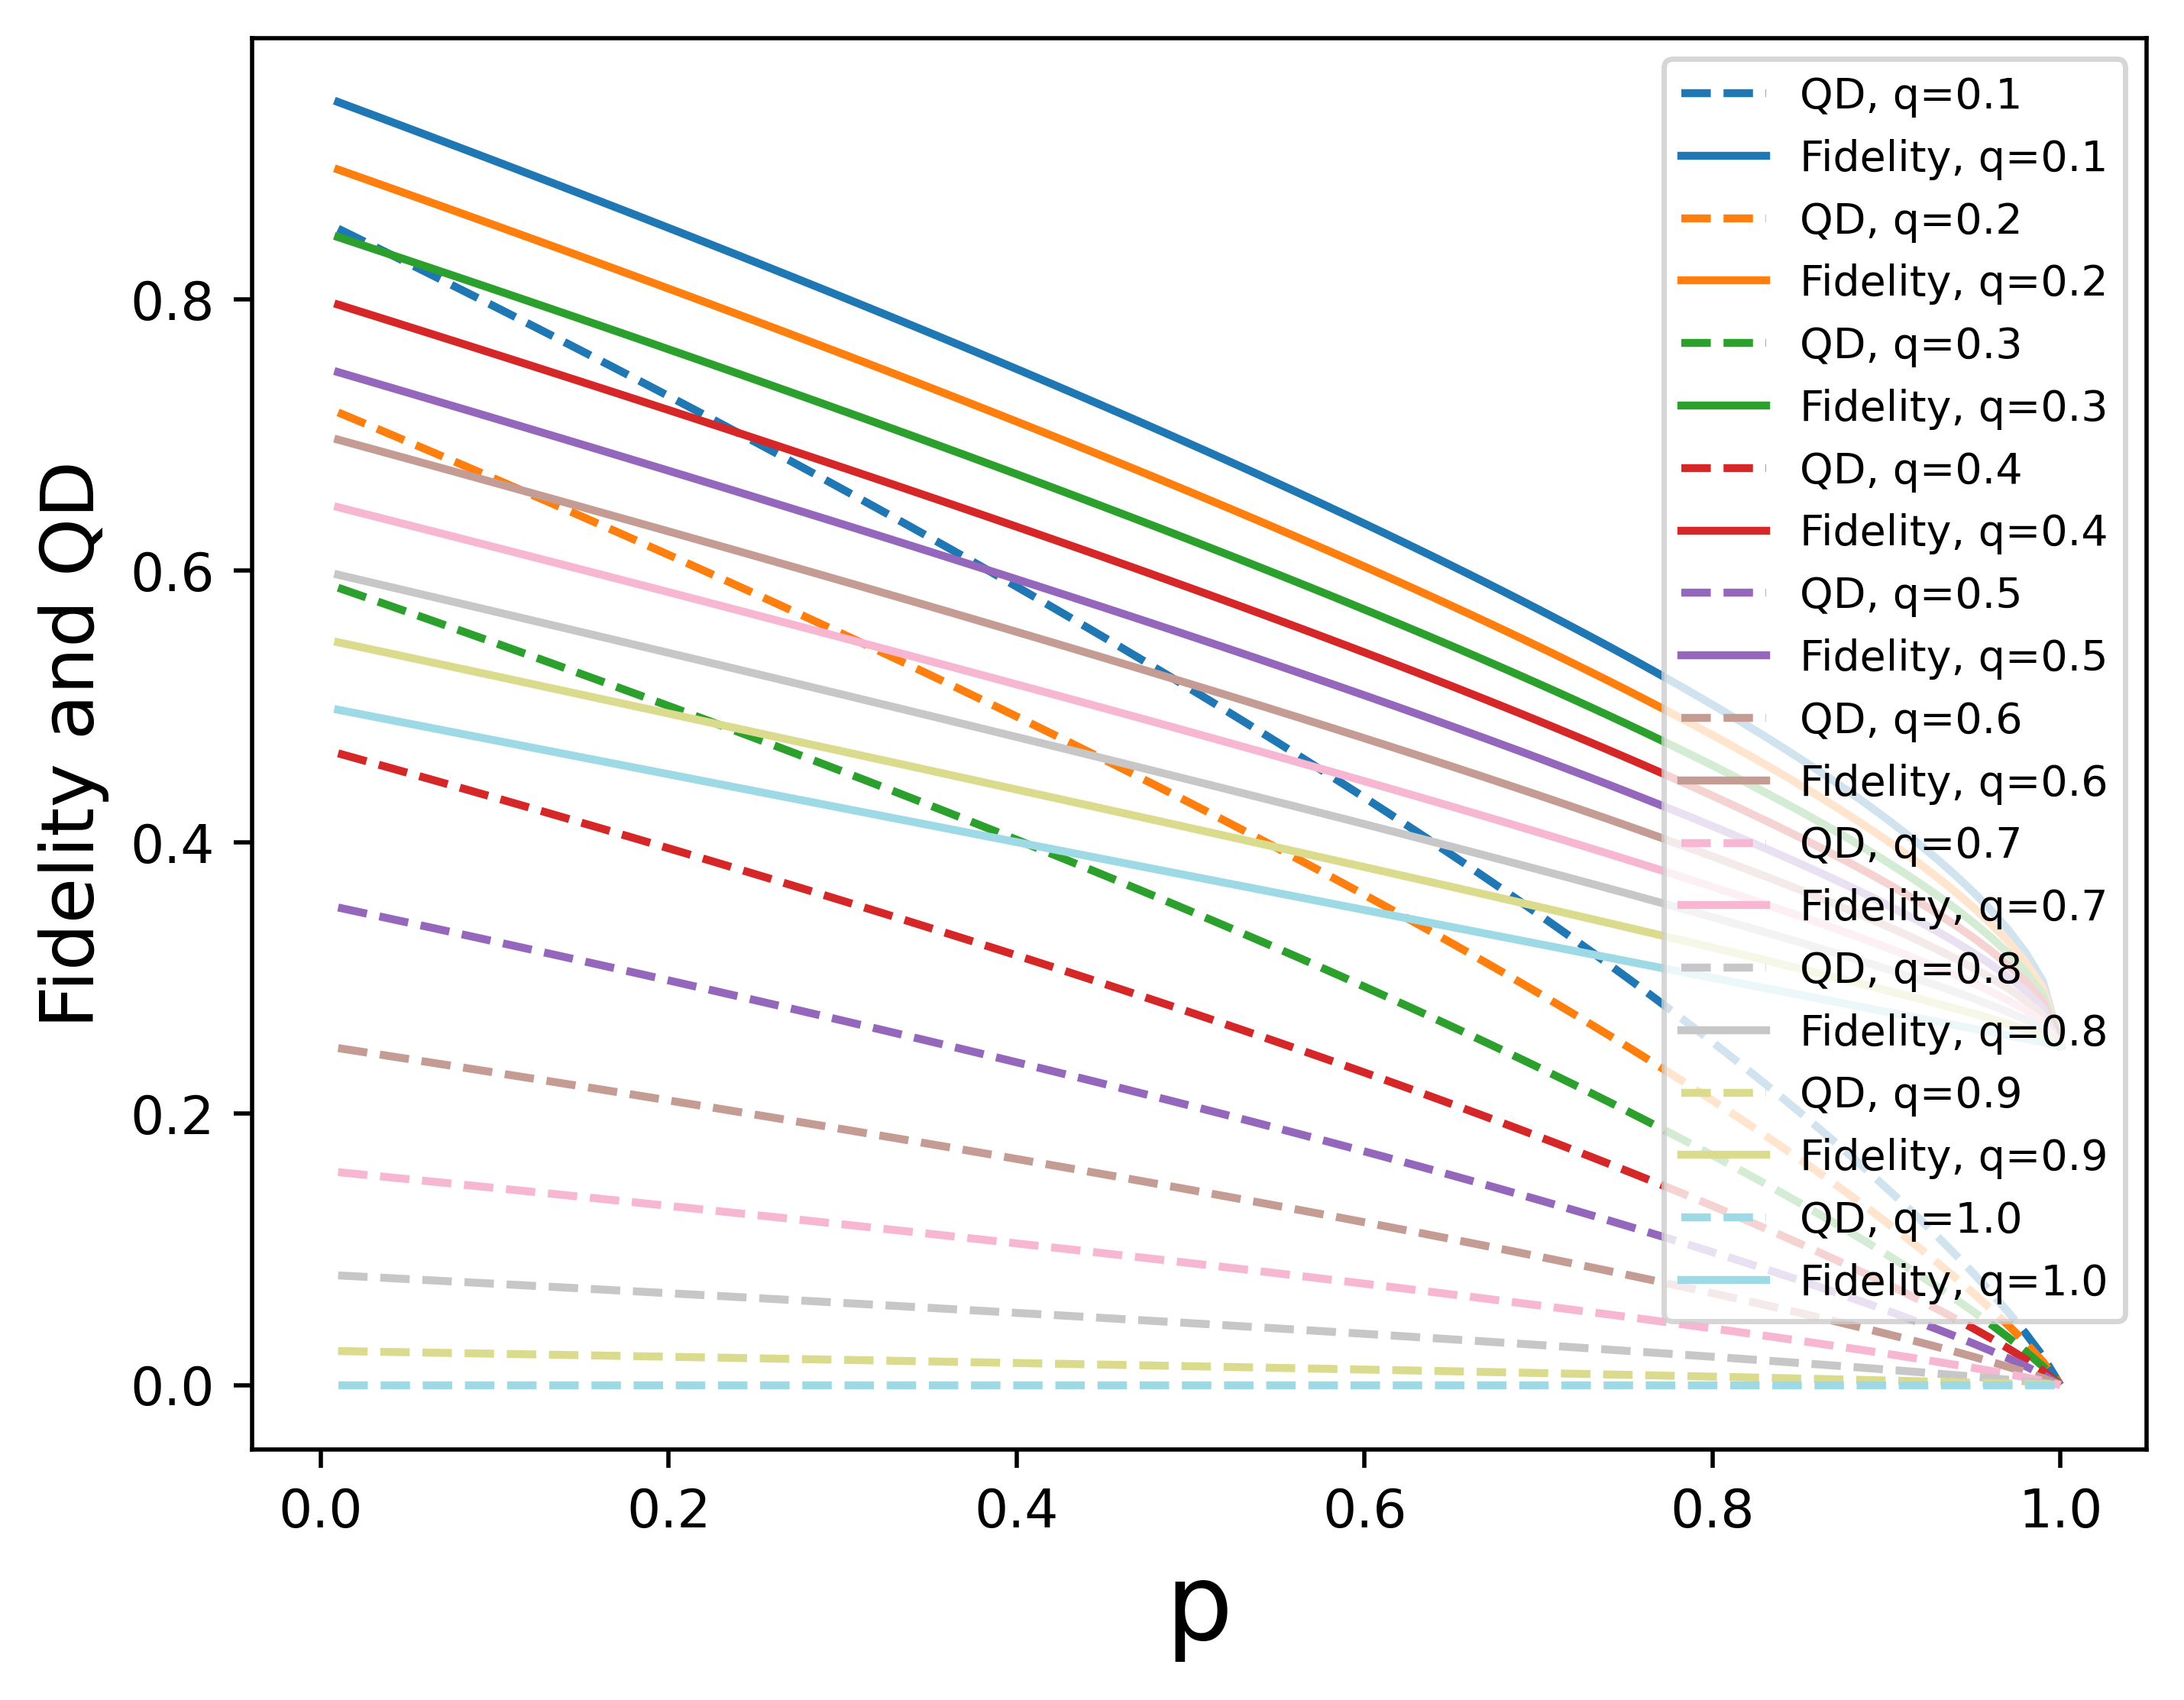

In [20]:
plt.figure(dpi=500)
for i in range(10):
  plt.plot(p, eof_list[i], label=f"QD, q={round(q[i],2)}", linestyle='--', color=colors[i])
  plt.plot(p, fid_list[i], label=f"Fidelity, q={round(q[i],2)}", color=colors[i])
plt.xlabel('p',fontsize=20)
plt.ylabel('Fidelity and QD',fontsize=14)
plt.legend(loc='upper right', fontsize=8)
plt.savefig('FidQD.png', bbox_inches='tight')
plt.show()